<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Python Modules**

In [ ]:
import numpy as np
from scipy.stats import mode, iqr, t, probplot, ttest_1samp
import statistics
from scipy.stats import binom, poisson, norm
import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns; sns.set()
import pandas as pd

!python --version

Descriptive Statistics
----------

In [55]:
X = np.array([10, 10, 6, 12, 6, 9, 16, 20, 11, 10, 11, 11, 9, 12, 11])
#X = np.array([23, 4, 29, 44, 47, 24, 40, 23, 23, 44, 33, 27, 60, 46, 61, 11, 23, 62, 31, 44, 77, 14, 65, 42])
#X = np.array([99, 85, 86, 71, 82, 95, 108, 87, 89, 89, 78, 86])
#X = np.array([12, 12, 12, 14, 15, 16, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 20, 20, 
#              20, 20, 20, 20, 21, 21, 21, 22, 22, 23, 23, 23, 24, 24, 25, 26, 26, 28, 28, 28])			  
#X = np.random.poisson(35, 15)

In [59]:
#sample range, mean and mode
R = np.ptp(X)  #sample range: ptp (peak to peak)
Xbar = np.mean(X) #sample mean
Q2 = np.median(X) #sample median
print('R={0:.2f}, Xbar={1:.2f}, Q2={2:.2f}'.format(R, Xbar, Q2))
M = mode(X) #sample mode
print("The mode is {} with a count of {}".format(M.mode[0], M.count[0]))

#Quartiles
Q1 = np.percentile(X, 25)
Q3 = np.percentile(X, 75)
IQR = iqr(X) #interquantile_range = Q3-Q1
print('Q1 = {0:.2f}, Q3 = {1:.2f}, IQR = {2:.2f}'.format(Q1, Q3, IQR))

#Variance and standard deviation
var = np.var(X, ddof=1) #sample variance
s = np.std(X, ddof=1) #sample standard deviation
print('var = {0:.2f}, s = {1:.2f}'.format(var, s))

R=14.00, Xbar=10.93, Q2=11.00
The mode is 11 with a count of 4
Q1 = 9.50, Q3 = 11.50, IQR = 2.00
var = 12.07, s = 3.47


In [51]:
#Python version 3.8
#statistics.quantiles(X, *, n=4, method='exclusive')  

36.5

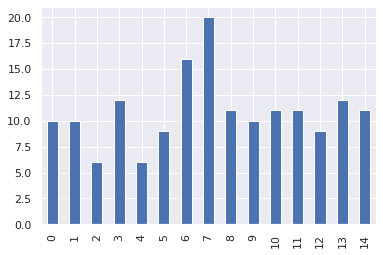

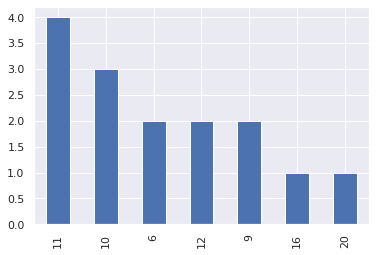

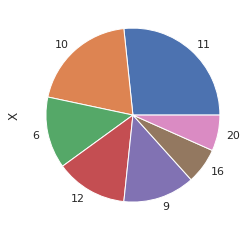

In [42]:
df = pd.DataFrame(X,columns=['X'])
df['X'].value_counts() #generate counts
df['X'].plot.bar()
plt.figure()
df['X'].value_counts().plot.bar()
plt.figure()
df['X'].value_counts().plot.pie()

**Stem and Leaf Plot**

In [43]:
def StemLeafPlot(d):
    #A stem-and-leaf plot
    l,t=np.sort(d),10
    O=range(l[0]-l[0]%t,l[-1]+11,t)
    I=np.searchsorted(l,O)
    for e,a,f in zip(I,I[1:],O): print('%3d|'%(f/t),*(l[e:a]-f),sep='')
    
StemLeafPlot(X) 

  0|6699
  1|0001111226
  2|0


**Bar chart**

Text(0, 0.5, 'Defects')

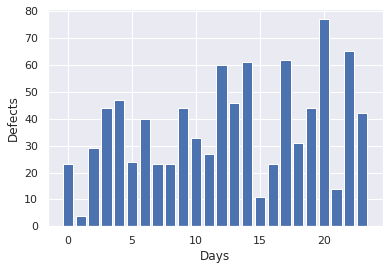

In [44]:
X = np.array([23, 4, 29, 44, 47, 24, 40, 23, 23, 44, 33, 27, 60, 46, 61, 11, 23, 62, 31, 44, 77, 14, 65, 42])
plt.bar(np.arange(len(X)), X)
plt.xlabel('Days')
plt.ylabel('Defects')

**Histogram**

Text(0, 0.5, 'Relative frequency')

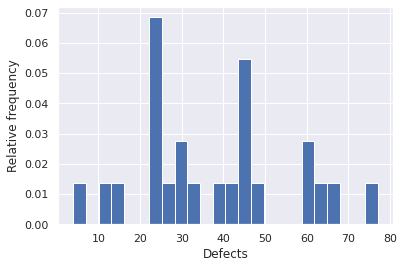

In [45]:
plt.hist(X, bins=len(X), density=True)
plt.xlabel('Defects')
plt.ylabel('Relative frequency')

**Boxplot**

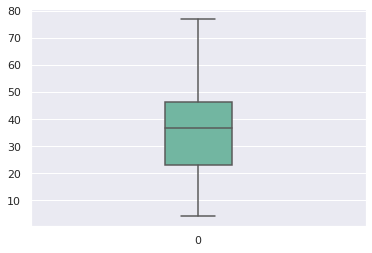

In [46]:
sns.boxplot(data=X, orient="v", width=.2, palette="Set2")

**Violin and swarm plots**

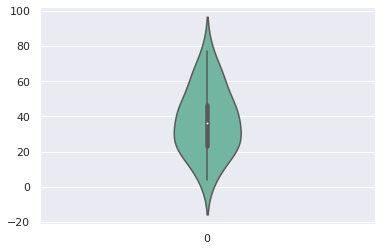

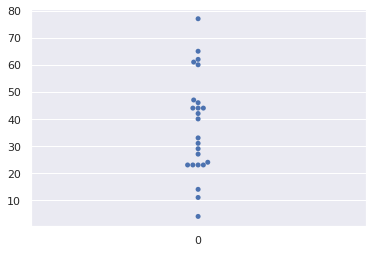

In [47]:
ax = sns.violinplot(data=X, width=.2, palette="Set2")
plt.figure()
ax = sns.swarmplot(data=X, edgecolor="gray")

**Normal probability plot:** Generates a probability plot of sample data against the quantiles

((array([-1.90380091, -1.48287381, -1.22601535, -1.03156092, -0.8698858 ,
         -0.7282709 , -0.59996024, -0.48085763, -0.36822879, -0.26009875,
         -0.154935  , -0.05146182,  0.05146182,  0.154935  ,  0.26009875,
          0.36822879,  0.48085763,  0.59996024,  0.7282709 ,  0.8698858 ,
          1.03156092,  1.22601535,  1.48287381,  1.90380091]),
  array([ 4, 11, 14, 23, 23, 23, 23, 24, 27, 29, 31, 33, 40, 42, 44, 44, 44,
         46, 47, 60, 61, 62, 65, 77])),
 (19.16451127433585, 37.375, 0.985805249733491))

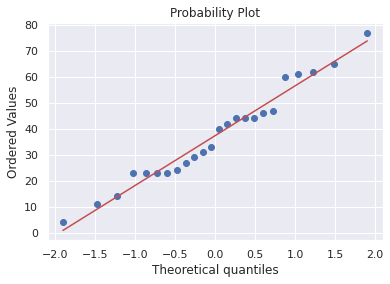

In [49]:
probplot(X, plot=plt)

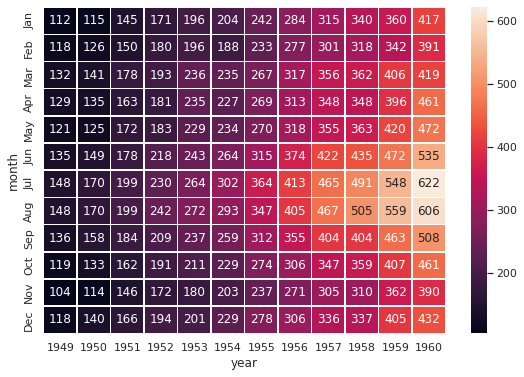

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

Probability
------------
**Binomial distribution**

In [ ]:
#Binomial parameters n and p
n, p = 200, 0.0128
# x = np.arange(0, n) # entire range not practical
# Instead chose range within some probability threshold
x = np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p))
plt.figure()
plt.stem(x, binom.pmf(x, n, p), use_line_collection=True)
plt.title('Binomial ($n$={0}, $p$={1})'.format(n, p))
plt.xlabel('Number of successes')
plt.ylabel('Probability mass function')
plt.show()

**Poisson distribution**

In [ ]:
lamda = 0.75
x = np.arange(poisson.ppf(0.01, lamda), poisson.ppf(0.999, lamda))
plt.figure()
plt.stem(x, poisson.pmf(x, lamda), use_line_collection=True)
plt.title('Poisson ($\lambda$={0})'.format(lamda))
plt.xlabel('Number of occurances')
plt.ylabel('Probability mass function')
#plt.autoscale(enable=True, axis='y', tight=True)
plt.show()

**Gaussian distribution**

In [ ]:
mu_sigmas = [(0, 0.8), (0, 1), (0, 2), (2, 1)]
x = np.linspace(norm.ppf(0.01, 0, 2), norm.ppf(0.99, 0, 2), 1000)
plt.figure()
for mu, sigma in mu_sigmas:
    plt.plot(x, norm.pdf(x, mu, sigma), 
             label=('$\\mu$={0}, $\\sigma$={1}'.format(mu, sigma)))
    plt.title('Normal Distributions')
    plt.xlabel('$x$')
    plt.ylabel('Probability density function $f(x)$')
plt.legend()
#plt.autoscale(enable=True, axis='both', tight=True)
plt.show()

**Central limit theorem using uniform (try with other distributions)**

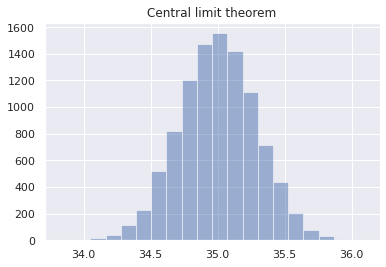

In [ ]:
N = 10000
sim = np.zeros(N)
for i in range(N):
    sim[i] = np.mean(np.random.uniform(30, 40, 100))
plt.figure()
plt.hist(sim, bins=20, alpha=0.5)	
plt.title('Central limit theorem')
plt.show()